In [33]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd

In [146]:
filename = './data/AGN/CSS071204:100029+071116.fits'

In [147]:
data, h = fitsio.read(filename, header=True)
print(h)


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                   27 / width of table in bytes
NAXIS2  =                  114 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    6 / number of fields in each row
TTYPE1  = 'HDU_Ext '           / label for field   1
TFORM1  = '4A      '           / data format of field: ASCII Character
TTYPE2  = 'Sequence'           / label for field   2
TFORM2  = '2A      '           / data format of field: ASCII Character
TTYPE3  = 'Date    '           / label for field   3
TFORM3  = '7A      '           / data format of field: ASCII Character
TTYPE4  = 'Field_ID'           / label for field   4
TFORM4  = '6A      '           / data format of field: ASCII Character
TTYPE5  = 'Obs_In_Seq'         / label f

In [4]:
CRTS_ID = h['CRTS_ID']
RA = h['RA (J2000)']
Dec = h['Dec (J2000)']
Class = h['CLASSIFICATION']

print(CRTS_ID,RA,Dec,Class)

CSS090421:174806+340401 267.02421 34.06696 Blazar MG2_J174803+3403 mag 19,1


In [5]:
data = fitsio.read(filename, ext=1)
df = pd.DataFrame(data, columns=['HDU_Ext','Sequence','Date','MJD','Field_ID','Obs_In_Seq','Cutout'], dtype=str)
df

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
0,2,01,08APR12,54568.38096,N35079,0004,1303
1,3,01,08JUN15,54632.26342,N35079,0001,1302
2,4,01,08JUN15,54632.26851,N35079,0002,1302
3,5,01,08JUN15,54632.27328,N35079,0003,1302
4,6,01,08JUN15,54632.27808,N35079,0004,1302
5,7,01,08MAR06,54531.45059,N35079,0002,1303
6,8,01,08MAY06,54592.37925,N35079,0001,1303
7,9,01,08MAY06,54592.3863,N35079,0002,1303
8,10,01,08MAY06,54592.40046,N35079,0004,1303
9,11,01,08MAY12,54598.3587,N35079,0001,1303


In [6]:
dates = np.unique(df['Date'])
dates

array(['08APR12', '08JUN15', '08MAR06', '08MAY06', '08MAY12', '08OCT02',
       '08OCT26', '08SEP22', '09AUG20', '09JUL11', '09JUL22', '09JUN14',
       '09JUN27', '09MAR03', '09MAR30', '09MAY25', '09NOV16', '09SEP21',
       '10APR13', '10JUL07', '10JUN10', '10JUN17', '10JUN23', '10MAR19',
       '10MAR25', '10MAY10', '10MAY23', '10NOV06', '10OCT19', '10SEP14'],
      dtype=object)

### Selecting the first date

In [7]:
date = dates[1]
example = df[ (df['Date']==date)]
example

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
1,3,01,08JUN15,54632.26342,N35079,0001,1302
2,4,01,08JUN15,54632.26851,N35079,0002,1302
3,5,01,08JUN15,54632.27328,N35079,0003,1302
4,6,01,08JUN15,54632.27808,N35079,0004,1302


In [8]:
exts = np.array(example['HDU_Ext']).astype(int)
obs = np.array(example['Obs_In_Seq']).astype(int)
MJD = np.array(example['MJD']).astype(float)
example

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
1,3,01,08JUN15,54632.26342,N35079,0001,1302
2,4,01,08JUN15,54632.26851,N35079,0002,1302
3,5,01,08JUN15,54632.27328,N35079,0003,1302
4,6,01,08JUN15,54632.27808,N35079,0004,1302


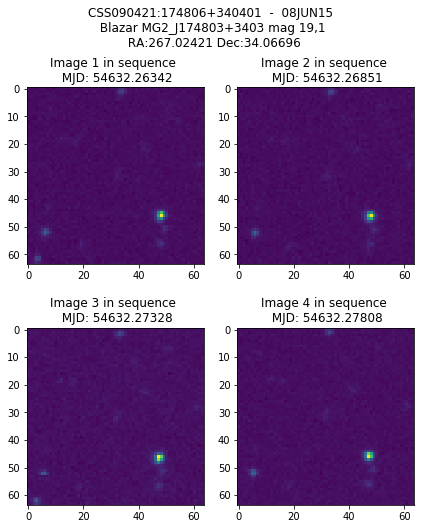

In [11]:
rows = int(len(exts)/2)
fig = plt.figure(figsize=(6,5*rows))
for i, ext in enumerate(exts):
    plt.subplot(rows+1,2,i+1)
    data = np.array(fitsio.read(filename, ext=ext))
    plt.imshow(data)
    plt.title('Image {} in sequence \n MJD: {}'.format(obs[i], MJD[i]))
plt.suptitle('{}  -  {} \n {} \n RA:{} Dec:{}'.format(CRTS_ID, date,Class,RA,Dec), y=1.05)
plt.tight_layout()
plt.show()

In [198]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

filename = '../tao_data/Complete/AGN/CSS071204:100029+071116/01_05APR06_N07053_0002_cutout_0118.fits'
hdul = fits.open(filename)

RA  =  hdul[0].header['RA']
DEC  =  hdul[0].header['DEC']
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  120                                                  
NAXIS2  =                  120                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2005-04-06T05:38:47' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'CADDSV3.1'          / Catalina Sky Survey                            
INSTRUME= 'SI 600-277'         / instrument                                     
DATE-OBS= '2005-04-06'         / UT date at beginning of obs.                   
EXPTIME =                 30.0 / actual integration time                        
VACUUM  =                   

In [208]:
from astropy import units as u
print(RA,DEC)
c = SkyCoord(RA, DEC, unit=(u.hourangle,u.deg))

ra = c.ra.degree
dec = c.dec.degree
print(ra,dec)

w = WCS(filename)
x, y = w.all_world2pix(ra, dec, 0)
print(x,y)

09:55:16.190 +07:05:21.63
148.8174583333333 7.089341666666666
1934.4985190213943 -112.50059052731162


### data = hdul[0].data
# data[int(x),int(y)] = -100
fig = plt.figure(figsize=(10,10))
plt.imshow(np.log10(data)+np.ones(len(data))*1000)
plt.show()

../tao_data/Complete/AGN/CSS071204:100029+071116/01_05APR06_N07053_0002_cutout_0118.fits


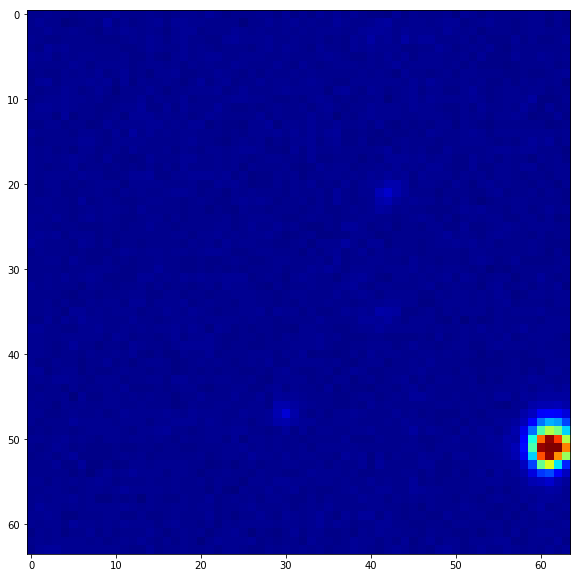

In [175]:
print(filename)
data2 = np.load(filename[:-5]+'_ROI_all.npy')
fig = plt.figure(figsize=(10,10))
plt.imshow(np.log10(data2))


In [148]:
# HIERARCH RA (J2000) = 150.11888
# HIERARCH DEC (J2000) = 7.18778